In [3]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import time
import Recommenders as Recommenders
import Evaluation as Evaluation

In [4]:
df= pd.read_csv("ratings_Electronics.csv",names=["userId","productId","ratings","ts"], header=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
ts           int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
df.head(20)

,userId,productId,ratings,ts
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [7]:
df.drop(columns=["ts"], inplace=True)

In [8]:
users= df["userId"].unique()

In [9]:
df["userId"].nunique()

4201696

Out of 7824482 only 4201696 userids are unique. Users data are repetitive in nature.

In [10]:
products= df["productId"].unique()

In [11]:
df["productId"].nunique()

476002

Products are also repeated.

In [12]:
df["ratings"].unique()

array([5., 1., 3., 2., 4.])

Ratings given in the range 1 to 5

In [13]:
from matplotlib import pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1022FCFD0>]],
      dtype=object)

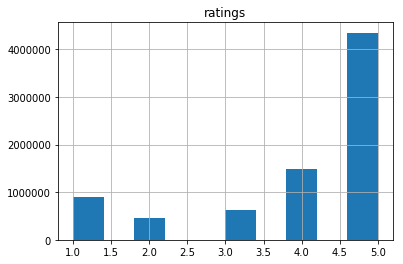

In [14]:
df.hist(column="ratings")

Take subset of dataset to make it less sparse/more dense.

In [15]:
groupuser=df.groupby(by= "userId").filter(lambda x: len(x)>100).sort_values(by="userId", )

In [16]:
groupuser

,userId,productId,ratings
1843066,A100UD67AHFODS,B001A5FH9S,5.0
6651559,A100UD67AHFODS,B009LL9VDG,5.0
4863320,A100UD67AHFODS,B005DOK8NW,5.0
6419230,A100UD67AHFODS,B008ZCAX2K,5.0
1381932,A100UD67AHFODS,B000U0S304,5.0
4511065,A100UD67AHFODS,B004VMM718,5.0
6034310,A100UD67AHFODS,B0082E9K7U,5.0
5706953,A100UD67AHFODS,B007BXSC8Q,5.0
5721026,A100UD67AHFODS,B007E8IJM2,1.0
1017308,A100UD67AHFODS,B000HZDF8W,5.0


Out of 4201696 users, 43309 users are selected who have purchased more than 100 times.

In [17]:
#groupuser.rename(columns={"userId":"user_id"}, inplace=True)

In [18]:
#groupuser.head(4)

shows distribution of rating across products

In [19]:
train_data, test_data = train_test_split(groupuser, test_size = 0.30, random_state=0)
print(train_data.head(5))

                 userId   productId  ratings
1744966   ARXU3FESTWMJJ  B00169N0BK      4.0
96000    A25FL6VLD7S23S  B00005B6UF      3.0
881065    A5JLAU2ARJ0BO  B000ETVKHE      4.0
6546997  A1EXGL6L0QQ0M5  B0099QUSGM      4.0
7236178  A3EXWV8FNSSFL6  B00CB2F65O      4.0


# POPULARITY BASED RECOMMENDATION SYSTEM

In [20]:
train_data_grouped= train_data.groupby("productId").agg({'userId':'count'}).reset_index()

In [21]:
train_data_grouped

,productId,userId
0,0594481813,1
1,0972683275,1
2,1400501776,1
3,1400532655,2
4,1400599997,1
5,1400699169,1
6,7562434166,1
7,787988002X,1
8,8862936826,1
9,9043413585,1


In [22]:
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)

In [23]:
train_data_grouped

,productId,score
0,0594481813,1
1,0972683275,1
2,1400501776,1
3,1400532655,2
4,1400599997,1
5,1400699169,1
6,7562434166,1
7,787988002X,1
8,8862936826,1
9,9043413585,1


In [24]:
train_data_sort = train_data_grouped.sort_values(by=['score', 'productId'],ascending = [0,1])

In [25]:
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')

In [26]:
popularity_recommendations = train_data_sort.head(5)

In [27]:
popularity_recommendations

,productId,score,Rank
13799,B0088CJT4U,52,1.0
8196,B002R5AM7C,42,2.0
9144,B003ES5ZUU,33,3.0
13689,B00829TIEK,33,4.0
4219,B000N99BBC,31,5.0


In [28]:
def recommend(user_id):    
        user_recommendations = popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['userId'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [29]:
recommend(users[8])


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,userId,productId,score,Rank
13799,A34ATBPOK6HCHY,B0088CJT4U,52,1.0
8196,A34ATBPOK6HCHY,B002R5AM7C,42,2.0
9144,A34ATBPOK6HCHY,B003ES5ZUU,33,3.0
13689,A34ATBPOK6HCHY,B00829TIEK,33,4.0
4219,A34ATBPOK6HCHY,B000N99BBC,31,5.0


In [30]:
recommend(users[23])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,userId,productId,score,Rank
13799,AMLFNXUIEMN4T,B0088CJT4U,52,1.0
8196,AMLFNXUIEMN4T,B002R5AM7C,42,2.0
9144,AMLFNXUIEMN4T,B003ES5ZUU,33,3.0
13689,AMLFNXUIEMN4T,B00829TIEK,33,4.0
4219,AMLFNXUIEMN4T,B000N99BBC,31,5.0


In above steps popularity based recommendation system is implemented. And for every user it returns the same products recommended

In [31]:
#USING CODE FROM RECOMMENDERS.PY

In [32]:
train_data.rename(columns={"userId":"user_id", "productId":"item_id"}, inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [33]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'item_id')

In [34]:
user_id = users[16]
pm.recommend(user_id)

['user_id', 'item_id', 'score', 'Rank']


,user_id,item_id,score,Rank
13799,A3N7T0DY83Y4IG,B0088CJT4U,52,1.0
8196,A3N7T0DY83Y4IG,B002R5AM7C,42,2.0
9144,A3N7T0DY83Y4IG,B003ES5ZUU,33,3.0
13689,A3N7T0DY83Y4IG,B00829TIEK,33,4.0
4219,A3N7T0DY83Y4IG,B000N99BBC,31,5.0
13685,A3N7T0DY83Y4IG,B00829THK0,31,6.0
10439,A3N7T0DY83Y4IG,B004CLYEDC,29,7.0
10440,A3N7T0DY83Y4IG,B004CLYEE6,28,8.0
13575,A3N7T0DY83Y4IG,B007WTAJTO,28,9.0
13907,A3N7T0DY83Y4IG,B008DWCRQW,28,10.0


# COLLABORATIVE FILTERING BASED RECOMMENDATION SYSTEM

# user-user CB

In [35]:
train_data.rename(columns={'userId':'user_id', 'productId':'item_id'})

,user_id,item_id,ratings
1744966,ARXU3FESTWMJJ,B00169N0BK,4.0
96000,A25FL6VLD7S23S,B00005B6UF,3.0
881065,A5JLAU2ARJ0BO,B000ETVKHE,4.0
6546997,A1EXGL6L0QQ0M5,B0099QUSGM,4.0
7236178,A3EXWV8FNSSFL6,B00CB2F65O,4.0
7583580,A3AYSYSLHU26U9,B00EZL1JQE,5.0
5031416,A17HMM1M7T9PJ1,B005JY5XK4,5.0
751554,A11KZ906QD08C5,B000BI7NHY,1.0
7536663,AZMY6E8B52L2T,B00EHJ6DV0,5.0
1855602,A2AY4YUOX2N1BQ,B001AO2274,4.0


In [36]:
train_data.rename(columns={"userId":"user_id", "productId":"item_id"}, inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [37]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'item_id')

In [38]:
#Print the songs for the user in training data
user_id = train_data.iloc[45,0]

user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

#for user_item in user_items:
    #print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A3F3B6HY9RJI04:
------------------------------------------------------------------------------------
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique products for the user: 75
no. of unique products in the training set: 17407
Non zero values in cooccurence_matrix :43616


,user_id,item_id,score,rank
0,A3F3B6HY9RJI04,B002TLSOGK,0.027044,1
1,A3F3B6HY9RJI04,B00CXADBRY,0.022637,2
2,A3F3B6HY9RJI04,B00006484F,0.021581,3
3,A3F3B6HY9RJI04,B0079UAT0A,0.021569,4
4,A3F3B6HY9RJI04,B002C7481G,0.021507,5
5,A3F3B6HY9RJI04,B008DWCRQW,0.021272,6
6,A3F3B6HY9RJI04,B0045XAIFU,0.021203,7
7,A3F3B6HY9RJI04,B0038KN114,0.021203,8
8,A3F3B6HY9RJI04,B002BW6DBU,0.020991,9
9,A3F3B6HY9RJI04,B00068E1ME,0.020918,10


In [39]:
#Print the products for the user in training data
user_id = train_data.iloc[4,0]

user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A3EXWV8FNSSFL6:
------------------------------------------------------------------------------------
B00CB2F65O
B000JV9LUK
B0013J5XZE
B0035FZ13I
B003P6IFNA
B00BVQ73IY
B00H7FYEPI
B001UQ6PYI
B00FDK34KU
B003S8891I
B0041L3JS4
B0012MI7N2
B001EYV9TM
B001QWQG22
B0018O77Q2
B000GBN42E
B00FSA8VQ2
B00336G7MI
B001NXDQD6
B002OEBILU
B006TF37H8
B000H3B6EO
B003M5IQLU
B00G2TK76A
B00HQO34HY
B007RIFKUS
B00GNVDO4E
B005IMFX2K
B001DXGBII
B00HZN1WTI
B00HBWU46U
B00006I53X
B000XB4412
B006DY3C5W
B00HFW1DY8
B00H7F9IVI
B00ITZQGT2
B00AR95FOU
B00F41TWWW
B004MM2DFC
B001TODUXA
B007MDQIH2
B000WPDKRI
B000HJ7606
B001CD3DDA
B002Q88CGI
B00465G49G
B0062EUE54
B004H466HG
B00EZL1HEI
B00JGGUZRC
B00B5C2UDC
B001TCJI7E
B00829TIA4
B00J008QZC
B001ELJER4
B00H56PA7U
B0033PROLW
B003CVOK28
B004GUS4WG
B00AEGFFM8
B000EXRSVM
B00030AXNQ
B00277PA36
B0006I09OS
B001F50EHS
B00HDW9MU2
B0021L9BZG
B003TVWNAM
B0012IJYZQ


,user_id,item_id,score,rank
0,A3EXWV8FNSSFL6,B007OY5V68,0.030114,1
1,A3EXWV8FNSSFL6,B0053R0WWG,0.026545,2
2,A3EXWV8FNSSFL6,B00HFFDDLG,0.026103,3
3,A3EXWV8FNSSFL6,B00GMTN96U,0.025728,4
4,A3EXWV8FNSSFL6,B00D5EO27U,0.025532,5
5,A3EXWV8FNSSFL6,B00BUACE8K,0.025140,6
6,A3EXWV8FNSSFL6,B00AKONZ3U,0.024711,7
7,A3EXWV8FNSSFL6,B00HMRDKO2,0.024497,8
8,A3EXWV8FNSSFL6,B00EDCF0MY,0.024458,9
9,A3EXWV8FNSSFL6,B00GGNDX1I,0.024038,10


# ITEM ITEM CB

In [40]:
#is_model.get_similar_items(['B007OY5V68'])

In [41]:
test_data.rename(columns={"userId":"user_id", "productId":"item_id"}, inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [42]:
train_data.rename(columns={"userId":"user_id", "productId":"item_id"}, inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [43]:
#test_data.rename(columns={"userId":"user_id", "productId":"item_id"}, inplace=True)

In [44]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

print(pr)
#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:280
Length of user sample:14
Getting recommendations for user:A100UD67AHFODS
No. of unique products for the user: 85
no. of unique products in the training set: 17407
Non zero values in cooccurence_matrix :27681
['user_id', 'item_id', 'score', 'Rank']
Getting recommendations for user:A3DWO5RJDA430F
No. of unique products for the user: 108
no. of unique products in the training set: 17407
Non zero values in cooccurence_matrix :23322
['user_id', 'item_id', 'score', 'Rank']
Getting recommendations for user:AONUCJBC85BL
No. of unique products for the user: 100
no. of unique products in the training set: 17407
Non zero values in cooccurence_matrix :53708
['user_id', 'item_id', 'score', 'Rank']
Getting recommendations for user:A1T1YSCDW0PD25
No. of unique products for the user: 161
no. of unique products in the training set: 17407
Non zero values in cooccurence_matrix :66902
['user_id', 'item_id', 'score', 'Rank']
Getting recommendations for user:A149RNR5RH19

In [47]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.1])
    pl.xlim([0.0, 0.1])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


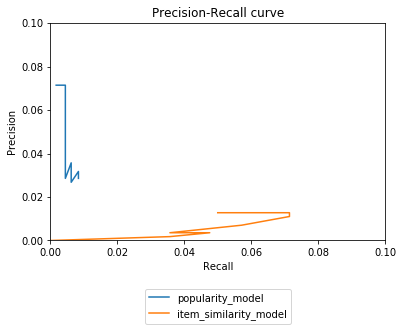

In [48]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")